In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
import langchain_core


from dotenv import load_dotenv; load_dotenv()

True

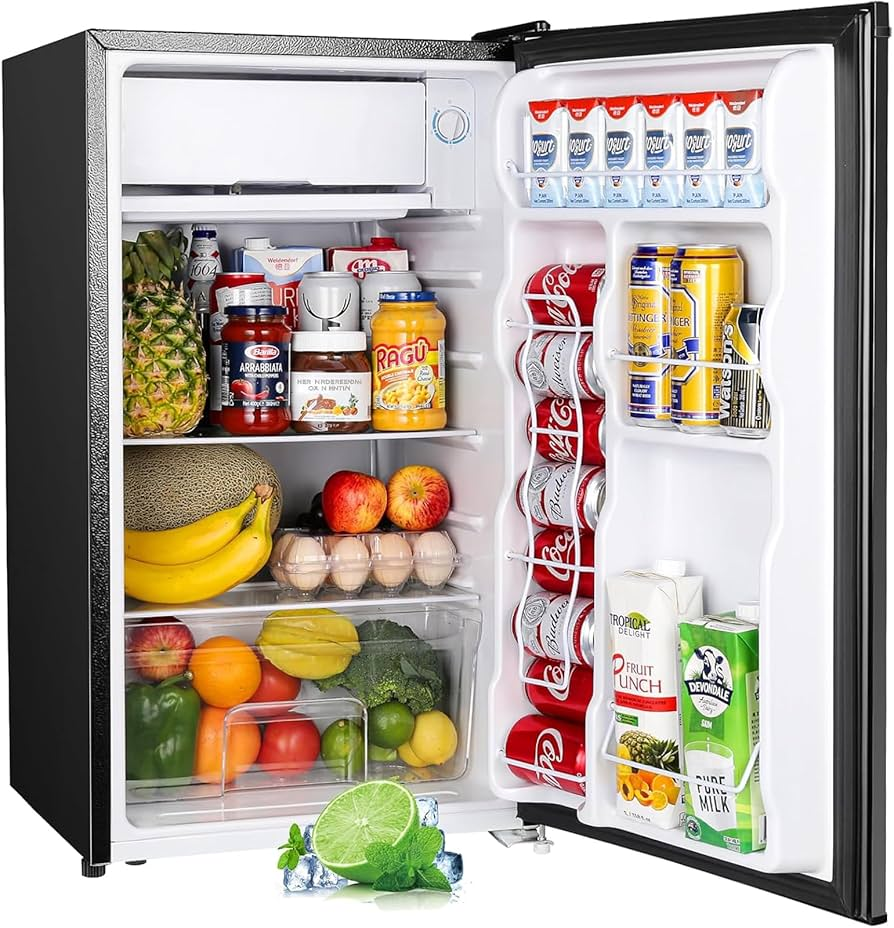

In [5]:
from PIL import Image  
from IPython.display import display

fridge_img = Image.open("Random_Fridge.png")
display(fridge_img)


In [6]:
from typing import Tuple
from pydantic import BaseModel, Field
from langchain_core.output_parsers import PydanticOutputParser

class item(BaseModel):
    item_name: str = Field(..., description="a single word that tells what the item is(ex. milk, chees, apple, ...)")
    number: int = Field(..., description="number of each item that exist in the image")

class StructuredOutput(BaseModel):
    fridge : list[item]


parser = PydanticOutputParser(pydantic_object=StructuredOutput)
format_instructions = parser.get_format_instructions()

In [7]:
print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"$defs": {"item": {"properties": {"item_name": {"description": "a single word that tells what the item is(ex. milk, chees, apple, ...)", "title": "Item Name", "type": "string"}, "number": {"description": "number of each item that exist in the image", "title": "Number", "type": "integer"}}, "required": ["item_name", "number"], "title": "item", "type": "object"}}, "properties": {"fridge": {"items": {"$ref": "#/$defs/item"}, "title": "Fridge", "type": "array"}}, "required": ["fridge"]}
```


In [8]:
prompt = ChatPromptTemplate.from_messages([
    ("system",
     "You are a helpful assistant. "
     "You will be given an image of a fridge, and you must name each ingredient you see and count how many of each ingredient appears. "
     "You MUST follow the output format exactly as instructed."),
     
    ("human",
     "Below is an image of the interior of a fridge:\n"
     "{img}\n"
     "Please analyze the image carefully and list every ingredient you can find, "
     "with the count for each one. Do not make up ingredients that are not present. "
     "Follow this format:\n"
     "{format_instructions}")
])
print(prompt)

input_variables=['format_instructions', 'img'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant. You will be given an image of a fridge, and you must name each ingredient you see and count how many of each ingredient appears. You MUST follow the output format exactly as instructed.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['format_instructions', 'img'], input_types={}, partial_variables={}, template='Below is an image of the interior of a fridge:\n{img}\nPlease analyze the image carefully and list every ingredient you can find, with the count for each one. Do not make up ingredients that are not present. Follow this format:\n{format_instructions}'), additional_kwargs={})]


In [10]:
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(temperature=0)

chain = prompt | llm | StrOutputParser()

response = chain.invoke({
    "img": fridge_img,
    "format_instructions": format_instructions,
})

print(response)


{
  "fridge": [
    {
      "item_name": "eggs",
      "number": 1
    },
    {
      "item_name": "milk",
      "number": 2
    },
    {
      "item_name": "cheese",
      "number": 3
    },
    {
      "item_name": "lettuce",
      "number": 1
    },
    {
      "item_name": "tomato",
      "number": 2
    },
    {
      "item_name": "yogurt",
      "number": 1
    }
  ]
}
